### Data Installation

In [1]:
#!pip install opendatasets #uncomment when needed

In [2]:
#import opendatasets as od
#od.download('https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset/download?datasetVersionNumber=1')

### Data Preparation

In [3]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Relation of feature columns with the target column
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [7]:
df = df.drop(columns=['Pregnancies', 'BloodPressure','SkinThickness',	'Insulin', 'DiabetesPedigreeFunction' ])
df.columns

Index(['Glucose', 'BMI', 'Age', 'Outcome'], dtype='object')

In [8]:
df.isnull().sum()

Glucose    0
BMI        0
Age        0
Outcome    0
dtype: int64

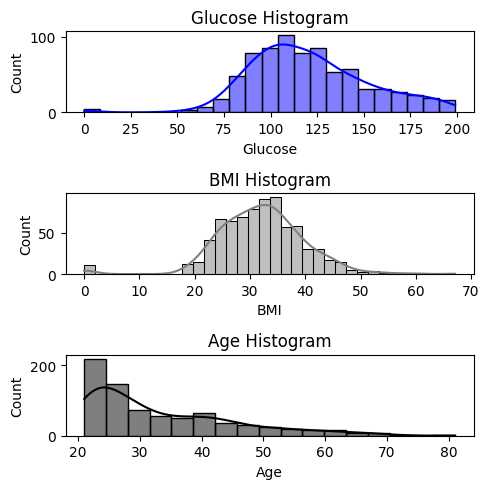

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, figsize=(5, 5))

sns.histplot(data=df['Glucose'], kde=True, ax=axes[0], color='blue').set(title='Glucose Histogram')
sns.histplot(data=df['BMI'], kde=True, ax=axes[1], color='grey').set(title='BMI Histogram')
sns.histplot(data=df['Age'], kde=True, ax=axes[2], color='black').set(title='Age Histogram')

plt.tight_layout()
plt.show()


In [10]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

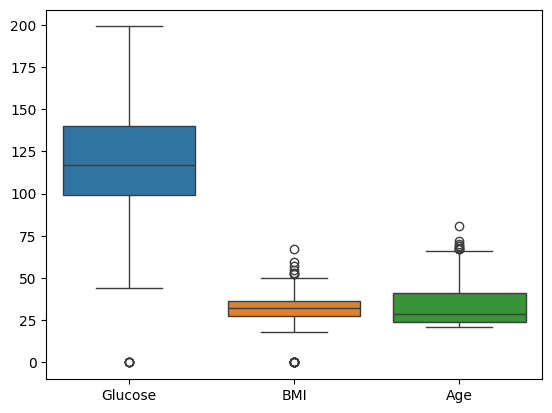

In [11]:
sns.boxplot(data=df[['Glucose', 'BMI', 'Age']])
plt.show()

In [12]:
#outlier seperation
Q1 = df[['Glucose', 'BMI', 'Age']].quantile(0.25)
Q3 = df[['Glucose', 'BMI', 'Age']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[['Glucose', 'BMI', 'Age']] < (Q1 - 1.5 * IQR)) | (df[['Glucose', 'BMI', 'Age']] > (Q3 + 1.5 * IQR))).any(axis=1)
df_outliers = df[outliers]
len(df_outliers)

32

In [13]:
#removing outliers
df = df[~outliers]
df.shape

(736, 4)

In [14]:
df.Outcome.value_counts()

Outcome
0    480
1    256
Name: count, dtype: int64

In [15]:
#initializing features and targets
features_neq = df.drop('Outcome', axis=1).values
targets_neq = df['Outcome'].values

In [16]:
features_neq[0], targets_neq[0]

(array([148. ,  33.6,  50. ]), np.int64(1))

In [17]:
len(features_neq), len(targets_neq)

(736, 736)

In [18]:
#Handling imbalanced dataset
from collections import Counter
print("Count of Target before over sampling: ",Counter(targets_neq))
from imblearn.over_sampling import SMOTE
os = SMOTE(sampling_strategy='minority',random_state=2007)
features_n,targets_n = os.fit_resample(features_neq,targets_neq)
print("Count of Target after over sampling: ",Counter(targets_n))

Count of Target before over sampling:  Counter({np.int64(0): 480, np.int64(1): 256})
Count of Target after over sampling:  Counter({np.int64(1): 480, np.int64(0): 480})


In [19]:
import torch
features = torch.tensor(features_n, dtype=torch.float32)
targets = torch.tensor(targets_n, dtype=torch.float32)

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(features,targets,test_size=0.2,random_state=2007)

In [21]:
len(X_train),len(y_train),len(X_val),len(y_val)

(768, 768, 192, 192)

In [22]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)

### Machine Learning

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate the model
log_model = LogisticRegression()

# Train the model
log_model.fit(X_train_norm, y_train)

# Make predictions on the validation set
y_pred = log_model.predict(X_val_norm)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.78125
Confusion Matrix:
 [[83 20]
 [22 67]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       103
         1.0       0.77      0.75      0.76        89

    accuracy                           0.78       192
   macro avg       0.78      0.78      0.78       192
weighted avg       0.78      0.78      0.78       192



In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate the model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train_norm, y_train)

# Make predictions on the validation set
y_pred = knn_model.predict(X_val_norm)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7604166666666666
Confusion Matrix:
 [[72 31]
 [15 74]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.70      0.76       103
         1.0       0.70      0.83      0.76        89

    accuracy                           0.76       192
   macro avg       0.77      0.77      0.76       192
weighted avg       0.77      0.76      0.76       192



In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate the model
rf_model = RandomForestClassifier(n_estimators=200)

# Train the model
rf_model.fit(X_train_norm, y_train)

# Make predictions on the validation set
y_pred = rf_model.predict(X_val_norm)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7708333333333334
Confusion Matrix:
 [[76 27]
 [17 72]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.74      0.78       103
         1.0       0.73      0.81      0.77        89

    accuracy                           0.77       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.78      0.77      0.77       192



In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate the model
dec_model = DecisionTreeClassifier()

# Train the model
dec_model.fit(X_train_norm, y_train)

# Make predictions on the validation set
y_pred = dec_model.predict(X_val_norm)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7552083333333334
Confusion Matrix:
 [[77 26]
 [21 68]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.75      0.77       103
         1.0       0.72      0.76      0.74        89

    accuracy                           0.76       192
   macro avg       0.75      0.76      0.75       192
weighted avg       0.76      0.76      0.76       192



In [27]:
from tabulate import tabulate

# Define the data
data = [
    ["Random Forest Classifier", "79.68%"],
    ["Logistic Regression", "78.12%"],
    ["Decision Tree Classifier", "76.56%"],
    ["K-Nearest Neighbors Classifier", "76.04%"]
]

# Define the headers
headers = ["ML Algorithm", "Accuracy"]

# Print the table
print(tabulate(data, headers=headers, tablefmt="grid"))


+--------------------------------+------------+
| ML Algorithm                   | Accuracy   |
+================================+============+
| Random Forest Classifier       | 79.68%     |
+--------------------------------+------------+
| Logistic Regression            | 78.12%     |
+--------------------------------+------------+
| Decision Tree Classifier       | 76.56%     |
+--------------------------------+------------+
| K-Nearest Neighbors Classifier | 76.04%     |
+--------------------------------+------------+


### Deep Learning

In [28]:
from torch.utils.data import TensorDataset, DataLoader
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_norm, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_norm, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Create DataLoader objects for train and validation sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

C:\Users\mohda\AppData\Local\Temp\ipykernel_12740\4255503765.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
C:\Users\mohda\AppData\Local\Temp\ipykernel_12740\4255503765.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_val_tensor = torch.tensor(y_val, dtype=torch.float32)


#### Model

In [29]:
import torch.nn as nn
class DiabetesModel(nn.Module):
  def __init__(self, input_size):
        super(DiabetesModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),

            nn.Linear(32, 64),
            nn.ReLU(),

            nn.Linear(64, 128),
            nn.ReLU(),

            nn.Linear(128, 64),
            nn.ReLU(),

            nn.Linear(64, 64),
            nn.ReLU(),

            nn.Linear(64, 32)
        )
        self.classifier = nn.Sequential(
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
  def forward(self, x):
    network = self.network(x)
    classifier = self.classifier(network)
    return classifier

In [30]:
# Instantiate the model
input_size = X_train.shape[1]
model = DiabetesModel(input_size)

In [31]:
model

DiabetesModel(
  (network): Sequential(
    (0): Linear(in_features=3, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=64, bias=True)
    (9): ReLU()
    (10): Linear(in_features=64, out_features=32, bias=True)
  )
  (classifier): Sequential(
    (0): Linear(in_features=32, out_features=1, bias=True)
    (1): Sigmoid()
  )
)

In [32]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
print(f"Number of parameters in the model: {num_params}")

Number of parameters in the model: 25089


#### Training

In [33]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [34]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np

def train(model, train_loader, val_loader, criterion, optimizer, num_epochs, patience=5):
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)
    best_val_loss = np.inf
    counter = 0
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
        train_loss /= len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                val_loss += criterion(outputs, labels.unsqueeze(1)).item()
                predicted = (outputs > 0.5).float()
                correct += (predicted == labels.unsqueeze(1)).sum().item()
                total += labels.size(0)
            val_loss /= len(val_loader.dataset)
            val_accuracy = correct / total

        scheduler.step(val_loss)
          # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")


    return epoch+1, train_loss, val_loss, val_accuracy

In [35]:
# Assuming model, train_loader, val_loader, criterion, and optimizer are already defined
num_epochs = 500
patience = 50
history = train(model, train_loader, val_loader, criterion, optimizer, num_epochs, patience)

C:\Users\mohda\AppData\Roaming\Python\Python311\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/500, Train Loss: 0.5887, Val Loss: 0.0076, Val Accuracy: 0.7708
Epoch 2/500, Train Loss: 0.5280, Val Loss: 0.0071, Val Accuracy: 0.7812
Epoch 3/500, Train Loss: 0.5258, Val Loss: 0.0065, Val Accuracy: 0.7865
Epoch 4/500, Train Loss: 0.4943, Val Loss: 0.0064, Val Accuracy: 0.8073
Epoch 5/500, Train Loss: 0.4972, Val Loss: 0.0063, Val Accuracy: 0.7865
Epoch 6/500, Train Loss: 0.4868, Val Loss: 0.0067, Val Accuracy: 0.7760
Epoch 7/500, Train Loss: 0.4785, Val Loss: 0.0069, Val Accuracy: 0.7812
Epoch 8/500, Train Loss: 0.4874, Val Loss: 0.0073, Val Accuracy: 0.8021
Epoch 9/500, Train Loss: 0.4748, Val Loss: 0.0064, Val Accuracy: 0.7865
Epoch 10/500, Train Loss: 0.4684, Val Loss: 0.0063, Val Accuracy: 0.8021
Epoch 11/500, Train Loss: 0.4567, Val Loss: 0.0064, Val Accuracy: 0.8125
Epoch 12/500, Train Loss: 0.4563, Val Loss: 0.0063, Val Accuracy: 0.8073
Epoch 13/500, Train Loss: 0.4544, Val Loss: 0.0063, Val Accuracy: 0.8073
Epoch 14/500, Train Loss: 0.4543, Val Loss: 0.0062, Val Accu

### Saving

In [36]:
from joblib import dump, load
# Save the machine learning model with highest stability and accuracy i.e 78%
dump(rf_model, 'diabates_random_forest.joblib')

from joblib import dump, load
import os

# Set the desired output folder path
output_path = r'C:\Users\mohda\Documents\AI Health Assistant\Notebook\diabates_output'

# Create the directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Full path to save the model
model_file_path = os.path.join(output_path, 'diabetes_random_forest.joblib')

# Save the machine learning model with highest stability and accuracy i.e 78%
dump(rf_model, model_file_path)

print(f"✅ Model saved successfully at: {model_file_path}")

✅ Model saved successfully at: C:\Users\mohda\Documents\AI Health Assistant\Notebook\diabates_output\diabetes_random_forest.joblib
